## Введение

### Описание проекта
Федерального оператор сотовой связи «Мегалайн». Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческому департаменту необходимо понять, какой тариф приносит больше денег.
в проекте предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
    
* Задача — проанализировать поведение клиентов 
* сделать вывод — какой тариф лучше для компании.

### Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
### Обратить внимание: 
«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<h2> План Исследования: </h2>



1. Изучение общей информации 
> * Получение информации в виде файлов
> * Открытие файлов, оценка их читаемости
> * Получение общей информации о данных
> * Осмотр "глазами"
> * Вывод
2. Подготовка данных
> * Проверка и устранение пропусков
> * Проверка и устранение дубликатов
> * Приведение данных к нужным типам
> * Поиск и исправление ошибок в данных: выбросы, неправильные названия, значения, артефакты.
> * Группировка данных по месяцам и пользователям, сведение в общую таблицу
> * Вывод
3. Анализ данных
> * Подсчет среднего количества, дисперсии и стандартного отклонения услуг по тарифам.
> * Построение гистограмм распределения услуг по тарифам
> * Вывод: описание распределений, поведение клиентов оператора, исходя из выборки.
4. Проверка гипотез
> * Пояснение в формулировании нулевой и альтернативной гипотезы
> * Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
> * Вывод по гипотезе
> * Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
> * Вывод по гипотезе
5. Вывод

## 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from math import factorial, ceil
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 35) # настройка отображения таблиц

**Открытие файлов, оценка их читаемости**

In [2]:
 # словарь с парами 'имя_таблицы:DataFrame' для удобства итерации по датафреймам. позже вынести в глобальные
dict_frames = {}

# Функция читате файл csv
def read_files(name_df, file): 
    try:
        name_df = pd.read_csv(file)
    except:
        print('Не удалось прочитать', file, 'проверьте расположение файла')
    return name_df
# Функция разбирает пути из списка, выделяет из каждого имя файла и записывает в индекс словаря: имя 
# а результат работы функции read_files в значение 
def read_files_get_list(files):
    for file in files:
        only_file_name = file.split("/")[-1][0:-4]
        dict_frames[only_file_name] = read_files(only_file_name, file)


In [3]:
files = [
    './datasets/users.csv', #     пользователи
    './datasets/calls.csv', #     звонкаи
    './datasets/messages.csv', #  сообщения
    './datasets/internet.csv', #  интернет - сессии
    './datasets/tariffs.csv' #    тарифы
]
# сохраняем фреймы в словарь
read_files_get_list(files)

globals().update(dict_frames) # Передаем названия и объекты таблиц в глобальное пространство имен

In [4]:
globals().update(dict_frames) # Передаем названия и объекты таблиц в глобальное пространство имен

**Проверяем данные "глазами", смотрим информацию**

In [5]:
for name, frame in dict_frames.items():
    print('=='*10, 'Таблица', name, '=='*10)
    print('')
    frame.info()
    print('------'*10)
    display(frame.head(3))
    print('------'*10)
    

==================== Таблица users ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
------------------------------------------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


------------------------------------------------------------
==================== Таблица calls ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
------------------------------------------------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


------------------------------------------------------------
==================== Таблица messages ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
------------------------------------------------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


------------------------------------------------------------
==================== Таблица internet ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
------------------------------------------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


------------------------------------------------------------
==================== Таблица tariffs ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
------------------------------------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


------------------------------------------------------------


## Вывод

Данные читаются. В таблице users имеются пропуски. Имеется необходимость менять типы данных. В таблице internet имеется столбец "Unnamed", неуказанный в условии. Надо далее решить что с ним делать.

## 2. Подготовка данных

### Пропуски

Проверим весь датасет на пропуски

In [6]:
for name, frame in dict_frames.items():
    if frame.isnull().sum().sum() > 0:
        print('Пропуски в {}'.format(name))
        print(frame.isnull().sum())
    else:
        print('В {} Пропусков не имеется'.format(name))

Пропуски в users
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
В calls Пропусков не имеется
В messages Пропусков не имеется
В internet Пропусков не имеется
В tariffs Пропусков не имеется


В таблице 'users[churn_date]' за исключением 38 записей пропуски. обрабатывать их не стоит. Это колонка о завершении исплользования тарифа. Отсутствие означает, что тариф еще действует.

### Дубликаты

In [7]:
for frame in dict_frames.values():
    if frame.duplicated().sum().sum() > 0:
        print(frame.duplicated().sum())
    else:
        print('Дубликатов строк не имеется')

Дубликатов строк не имеется
Дубликатов строк не имеется
Дубликатов строк не имеется
Дубликатов строк не имеется
Дубликатов строк не имеется


### Приведение данных к нужным типам

В замене типов нуждаются следующие колонки:

Таблица users
- churn_date    object на datetime
- reg_date      object на datetime
---
Таблица calls 
- call_date    object на datetime
- duration     float64 на int64 с округлением в большему целому (из условия)
---
Таблица messages
- message_date    object на datetime
---
Таблица internet
- session_date    object на datetime
- В mb_used      float64 на int64 с округлением в большему целому (из условия)

In [8]:
# Функция получает список столбцов для замены типа на datetime64. 
# Ищет столбцы по названиям во фреймах списка "datasets" и заменяет найденные на datetime64
# с обработкой возможных ошибок
def replace_to_date(replace_list, datasets):
    for name, frame in datasets.items():
        for column in replace_list:
            if column in frame.columns:
                if frame[column].dtypes != 'datetime64[ns]':
                    print('Попытка заменить тип данных {0}.{1}'.format(name, column))
                    try:
                        frame[column] = pd.to_datetime(frame[column], format = '%Y-%m-%dT%H:%M:%S')
                        print('Успех!')
                    except:
                        print('Отказ! Ошибка при изменении типа!')
                else:
                    print('Отказ! {0}.{1} Тип уже был datetime64'.format(name, column))

In [9]:
# все столбцы для замены типа данных на datetime64
date_list = ['churn_date', 'reg_date', 'call_date', 'message_date', 'session_date']

replace_to_date(date_list, dict_frames)

Попытка заменить тип данных users.churn_date
Успех!
Попытка заменить тип данных users.reg_date
Успех!
Попытка заменить тип данных calls.call_date
Успех!
Попытка заменить тип данных messages.message_date
Успех!
Попытка заменить тип данных internet.session_date
Успех!


In [10]:
#calls['duration'].dtypes

In [11]:
# Округление до большего целого 
#Параметры: dataframe - dataframe, columns - список столбцов для работы

def round_ceil (dataframe, columns):
    for column in columns:
        dataframe[column].apply(lambda x: ceil(x))
        print('{0} Оеруглено до большего целого'.format(column))

In [12]:
# Замена на другой тип. 
# Параметры: dataframe - dataframe, columns - список колонок, types - на какой надо тип сменить по умолчанию 'int'

def exch_type(dataframe, columns, types = 'int'):
    for column in columns:
        if dataframe[column].dtypes != types:
            print('Попытка заменить тип данных {0}'.format(column))
            try:
                dataframe[column] = dataframe[column].astype(types)
                print('Успех!')
            except:
                print('не удалось сменить тип в', column)
        else:
            print('Отказ! {0} Тип уже был {1}'.format(column, types))
    #print(dataframe.info())

In [13]:
#calls['duration'].apply(lambda x: ceil(x)) #Округляем до большего целого
#calls['duration'] = calls['duration'].astype('int') # Заменяем тип на int
#calls['duration'].dtypes

round_ceil (calls, ['duration'])
round_ceil (internet, ['mb_used'])

exch_type(calls, ['duration'])
exch_type(internet, ['mb_used'])



duration Оеруглено до большего целого
mb_used Оеруглено до большего целого
Попытка заменить тип данных duration
Успех!
Попытка заменить тип данных mb_used
Успех!


### Поиск и исправление ошибок в данных

Изучим предварительно данные на возможные аномалии, выбросы, оценим распределение.

In [14]:
for name, frame in dict_frames.items():
    print('=='*10, 'Таблица', name, '=='*10)
    print(frame.describe())
    print('==='*20)
    print()

==================== Таблица users ====================
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000

==================== Таблица calls ====================
            duration        user_id
count  202607.000000  202607.000000
mean        6.361350    1253.940619
std         5.735426     144.722751
min         0.000000    1000.000000
25%         1.000000    1126.000000
50%         6.000000    1260.000000
75%        10.000000    1379.000000
max        38.000000    1499.000000

==================== Таблица messages ====================
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000

==================== Таблица internet =====

Колонка "Unnamed: 0" в таблице internet является дубликатом индекса. попавшим сюда, возможно, по ошибке выгрузки. Ее можно удалить.

In [15]:
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

В таблице calls длительность звонков "duration"имеются нулевые значения. Посмотрим сколько это в процентах

In [16]:
def get_top_percent(data):
    total = data.value_counts()
    percent = (data.value_counts() / data.value_counts().sum()*100)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head(5)

In [17]:
get_top_percent(calls['duration'])

,Total,Percent
0,47927,23.655155
6,11509,5.680455
5,11457,5.654790
4,11405,5.629124
7,11268,5.561506


Звонки с продолжительностью 0.0 мин составляют почти четверть датасета. Скорее всего это неотвеченые вызовы. Удалять их не стоит. Эти значения будут учитываться в расчетах.

 В остальном ничего аномального.

### Группировка данных для каждого пользователя по месяцам

Добавим в таблицы информацию о месяце. Сгруппируем по 'user_id' и месяцам.
Объединим данные по звонкам, сообщениям, интернет траффику по id пользователя

In [18]:
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls['month'] = calls['call_date'].dt.month
#calls

In [19]:
internet_month = (
    internet.pivot_table(index=['user_id', 'month'], 
                         values=["mb_used"], 
                         aggfunc=['sum'])
)
internet_month.columns = ['month_mb_used']
#internet_month
internet_month = internet_month.reset_index(level = 'month') # Сброс индекса 'month'

In [20]:

messages_month = (
    messages.pivot_table(index=['user_id', 'month'], 
                         values=["id"], 
                         aggfunc=['count']))
messages_month.columns = ['message_used']
#messages_month
messages_month = messages_month.reset_index(level = 'month') # Сброс индекса 'month'

In [21]:
calls_month = (calls
               .pivot_table(index=['user_id', 'month'], 
                            values= ['duration', 'id'], 
                            aggfunc={'id' : 'count', 'duration' : 'sum'})
              )
calls_month.columns = ['minut_sum', 'Calls_count']
calls_month = calls_month.reset_index(level = 'month') # Сброс индекса 'month'
#calls_month.head(3)


Объединим данные по звонкам, сообщениям, интернет траффику по id пользователя

In [22]:
total_month = calls_month.merge(internet_month, on= ['user_id', 'month']) 
total_month = total_month.merge(messages_month, on= ['user_id', 'month'])
total_month = total_month.merge(users, on='user_id') # calls + users

Информацию по тарифам соединим по 'tariff_name', предварительно переименовов импортированный столбец 'tariff' из таблицы 'users'

In [23]:
total_month.rename(columns={'tariff': 'tariff_name'}, inplace=True)

In [24]:
total_month = total_month.merge(tariffs, on= 'tariff_name')

Подсчитаем экономическую часть.

In [25]:
# Минуты разговора
total_month['income_calls_over_limit'] = (
    np.where(total_month['minut_sum'] - total_month['minutes_included'] > 0, 
             (total_month['minut_sum'] - total_month['minutes_included']) * total_month['rub_per_minute'], 
             0)
)
# сообщения
total_month['income_messages_over_limit'] = (
    np.where(total_month['message_used'] - total_month['messages_included'] > 0, 
             (total_month['message_used'] - total_month['messages_included']) * total_month['rub_per_message'], 
             0)
)
# интернет - траффик
total_month['income_session_over_limit'] = (
    np.where(total_month['month_mb_used'] - total_month['mb_per_month_included'] > 0, 
             (np.ceil((total_month['month_mb_used'] - total_month['mb_per_month_included']) / 1024)) * total_month['rub_per_gb'], 
             0)
)
#общий помесячный итог 
total_month['income_total'] = (
    total_month['income_calls_over_limit'] 
    + total_month['income_messages_over_limit'] 
    + total_month['income_session_over_limit'] 
    + total_month['rub_monthly_fee']
)

In [26]:
total_month.head(3)

,user_id,month,minut_sum,Calls_count,month_mb_used,message_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income_calls_over_limit,income_messages_over_limit,income_session_over_limit,income_total
0,1000,5,142,22,2252,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0,0,0.0,1950.0
1,1000,6,144,43,23213,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0,0,0.0,1950.0
2,1000,7,299,47,13988,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0,0,0.0,1950.0


## Вывод 

* Данные были проверены на пропуски и дубликаты. 
* Пропуски в столбце о завершении использования тарифа обработке не подлежат, так как не мешают дальнейшему анализу. 
* Дубликаты отсутствуют. 
* Колонка "Unnamed: 0" в internet была удалена, так как дублировала индекс и имела пробел в названии. 
* Оставлены звонки с продолжительностью 0.0 мин. Они составляют почти четверть (23.7%) датасета. Их удаление привело бы к значительной потере данных.
* Тип данных в столбцы 'churn_date', 'reg_date', 'call_date', 'message_date', 'session_date' заменен на datetime64. Столбцы 'duration''mb_used' из таблиц 'calls' и 'internet' округлены до большего целого и приведены в тип 'int'

---

* В таблицы 'session_date','message_date','call_date' были добавлены номера месяцев, сгруппированы по месяцам, сброшен индекс месяца и объеденины между собой по полям 'user_id' и 'month' и с 'users' по полю 'user_id'  методом merge(). Таблица tariffs добавлена по 'tariff_name' после переименования соответствующего столбца в сборной таблице.
* На превышение тарифа по каждому из параметров посчитана и добавлена в таблицу стоимость доплат. "вычтитен бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьтен на значение из тарифного плана"
* В общий помесячный итог к суммам превышения лимитов прибавлена абонентская плату, соответствующая тарифному плану.


Таким образом имеется датафрейм для анализа с помесячными данными суммарного количества звонков, сообщений, интернет-трафика и выручки с каждого пользователя, а также все остальной информацией о пользователях и тарифах

## 3. Анализ данных

**Посчитаем среднее количество, медиану, дисперсию и стандартное отклонение**

In [27]:
total_month.pivot_table(
    index=['tariff_name'],
    values= ['minut_sum', 'month_mb_used', 'message_used'],
    aggfunc=['mean', 'median', 'var', 'std']
)

mean                                 median            \
            message_used   minut_sum month_mb_used message_used minut_sum   
tariff_name                                                                 
smart          38.767102  374.228198  16224.363446           34       380   
ultra          61.640957  494.740691  19578.083777           53       477   

                                   var                              \
            month_mb_used message_used     minut_sum month_mb_used   
tariff_name                                                          
smart             16441.0   718.803619  28096.018431  3.347878e+07   
ultra             19424.5  2008.550011  77033.372084  9.256154e+07   

                     std                            
            message_used   minut_sum month_mb_used  
tariff_name                                         
smart          26.810513  167.618670   5786.085325  
ultra          44.816850  277.548864   9620.890892

Разобъем 'total_month'на два датафрейма по названию тарифа.

In [28]:
ultra = total_month[total_month['tariff_name'] == 'ultra']
smart = total_month[total_month['tariff_name'] == 'smart']

In [29]:
def division_ultra_smart(column, title):
    gridsize = (3, 1)
    fig = plt.figure(figsize=(12, 6))    
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2) 
    ax2 = plt.subplot2grid(gridsize, (2, 0))
    ax1.set_title(title,fontsize=20)   
    ax1.hist(ultra[column], bins=50, alpha=0.5, label = 'ultra')
    ax1.hist(smart[column], bins=50, alpha=0.5, label = 'smart')
    ax2.boxplot([ultra[column], smart[column]], labels = ['ultra', 'smart'], vert=False, widths = 0.5)
    ax1.legend(loc = 'upper right', fontsize = 18)
    fig.tight_layout()

**Строим гистограммы распределения услуг по тарифам**

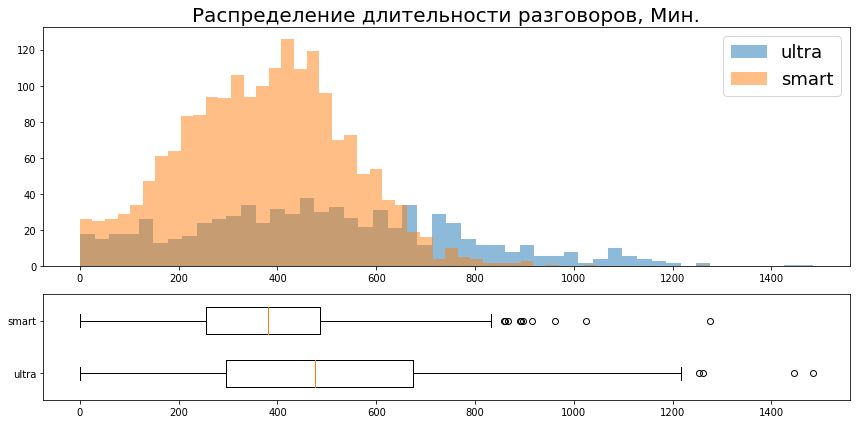

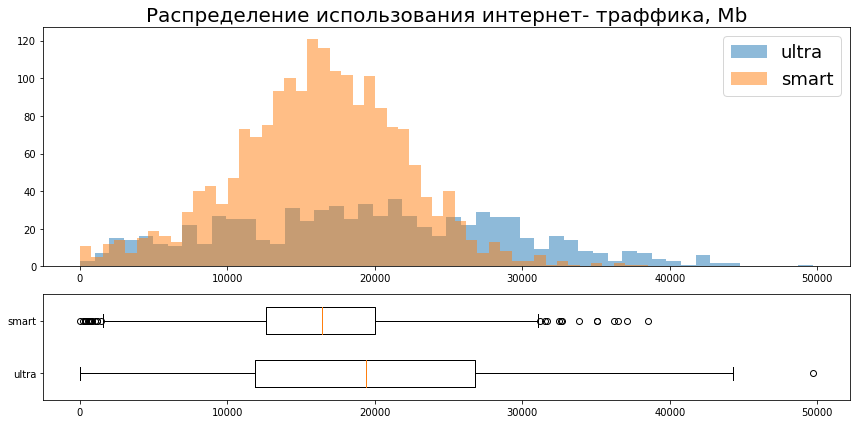

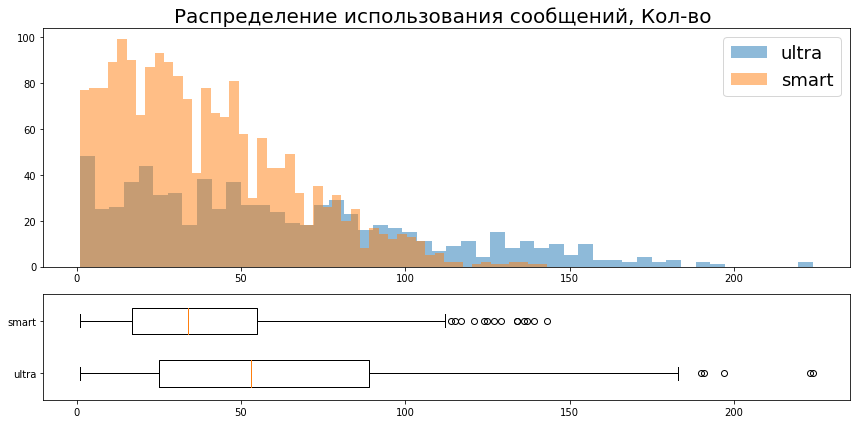

In [30]:
column_title = {
    'minut_sum':'Распределение длительности разговоров, Мин.',
    'month_mb_used':'Распределение использования интернет- траффика, Mb',
    'message_used':'Распределение использования сообщений, Кол-во '
}
for column, title in column_title.items():
    division_ultra_smart(column, title)

Пользователи тарифа ultra используют время разговора, интернет траффик и сообщения больше пользователей тарифа "smart".

## Вывод

Пользователи тарифа ultra являются общительными: ~480 мин, против ~380 мин, пользователей тарифа smart , используют больше сообщений: ~55 против ~30 и интернет траффика: ~20 против ~16Gb среднемесячно.

Датасеты длительности разговоров и траффика интернета в тарифе smart скошены влево, остальные с положительной скошенностью.
Для скошенных вправо данных медианы меньше среднего, а для скошенных влево — больше. 

## 4. Проверка гипотез

Гипотезы являетюся двусторонними. Две группы проверяемых количественных значений, в каждой проверяемой гипотезе являются независимыми. Для проверки будет использоваться T-критерий Стьюдента для средних значений двух независимых выборок. Это двусторонний тест для нулевой гипотезы о том, что 2 независимые выборки имеют одинаковые средние (ожидаемые) значения. Этот тест предполагает, что популяции имеют одинаковые отклонения по умолчанию.Тест измеряет, является ли среднее (ожидаемое) значение существенно отличается в разных выборках. Если мы наблюдаем большое значение p, например больше alpha = 0,05 или 0,1, тогда мы не можем отвергнуть нулевую гипотезу об одинаковых средних баллах. Если значение p меньше порогового значения alpha, тогда мы отвергаем нулевую гипотезу о равных средних значениях.

In [31]:
# совместное распределение данных с отображением нормального распределения функции плотности вероятности
def print_distplot(name, column, binss):
    sns.distplot(column, hist=True, fit=st.norm, kde=False, bins = binss, label = name)
    
    
def hist_norm (df_list, binss=15):
    fig = plt.figure(figsize=(12, 5))
    for name, column in df_list.items():
        print_distplot(name, column, binss)
    fig.legend(loc = 'upper right', fontsize = 18)
    fig.tight_layout()

In [32]:
# Т-Критерий Стьюдента
def t_criteria_student(frame1, frame2, alpha = .05):
    results = st.ttest_ind(frame1, frame2)
    print('p-значение:', results.pvalue)
# если p-value окажется меньше критический уровеня статистической значимости - отвергнем гипотезу
    if (results.pvalue < alpha):    
        print("Отвергаем нулевую гипотезу")
    else:
        print("Нет оснований для отвержения нулевой гипотезы.")

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается?

Посмотрим на графике совместное распределение тарифов с отображением нормального распределения функции плотности вероятности

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


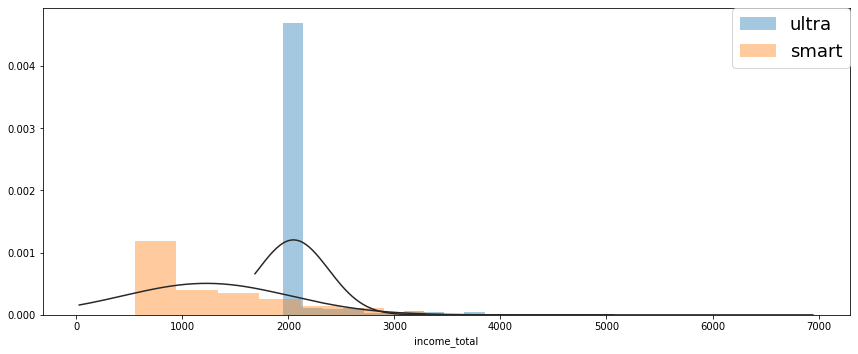

In [33]:
hist_list = {
    'ultra':ultra['income_total'],
    'smart':smart['income_total']
}
hist_norm (hist_list, binss=15)

**Проверим среднюю выручку по тарифам на равенство**

Исходя из природы Т критерия - о равенстве сравниваемых групп, формируем нулевую гипотезу H₀:
- «Нет. **Рразницы в выручке** тарифов «Ультра» и «Смарт» **нет**», то есть исследуемые параметры равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- «Да. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» **различается**»

In [34]:
t_criteria_student(ultra['income_total'], smart['income_total'], alpha = .05)

p-значение: 6.490713759770489e-148
Отвергаем нулевую гипотезу


### Вывод по гипотезе
Да, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?

In [35]:
Moskow = total_month[total_month['city'] == 'Москва']
Russia = total_month[total_month['city'] != 'Москва']

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


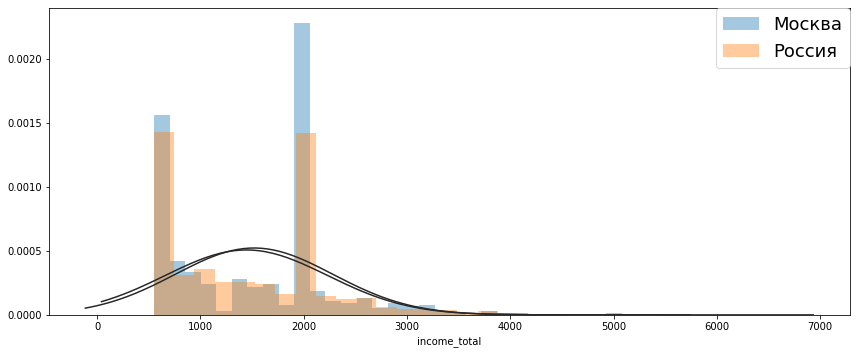

In [36]:
hist_list = {
    'Москва':Moskow.loc[:,'income_total'],
    'Россия':Russia.loc[:,'income_total']
}
hist_norm (hist_list, binss = 30)

**Сравним среднюю выручку из Москвы и выручку из других регионов**

Формируем нулевую гипотезу H₀:
- «Нет, Средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов», то есть исследуемые параметры равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- «Да. Средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов»

In [37]:
t_criteria_student(Moskow['income_total'], Russia['income_total'], alpha = .05)

p-значение: 0.057497690490394465
Нет оснований для отвержения нулевой гипотезы.


### Вывод по гипотезе
Нет, Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## 5. Вывод

Были получены данные в виде пяти файлов .csv. Файлы были прочитаны, обработаны по пропускам, типам данных, возможным ошибкам. Сформировна таблица для каждого пользователя помесячного расхода минут разговора, числа сообщений и расхода интернет траффика. Посчитаны помесячные платежи пользователей, добавлены в таблицу. В датафрейме также  имеется вся личная информация пользователей и информация о тарифах провайдера.

Анализ данных показал, что пользователи тарифа «Ультра» намного активнее пользуются предоставляемыми услугами.
На основе имеющихся данных имеется возможность сделать экономический анализ.

Проверка гипотез проводилась Т - критерием Стьюдента, критический уровеня статистической значимости был принят 0,05.

- Гипотеза: **Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается?**
- Ответ: **Да, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.**


- Гипотеза: **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?**
- Ответ: **Нет, Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**



### Баг-репорт

Колонка "Unnamed: 0" в таблице "internet" дублирует индекс. В описании датасета о ней нет информации.